In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [2]:
df=pd.read_csv('mushrooms.csv')

In [3]:
columns=df.columns
lb=LabelEncoder()
for i in columns:
    df[i]=lb.fit_transform(df[i])
df.describe()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

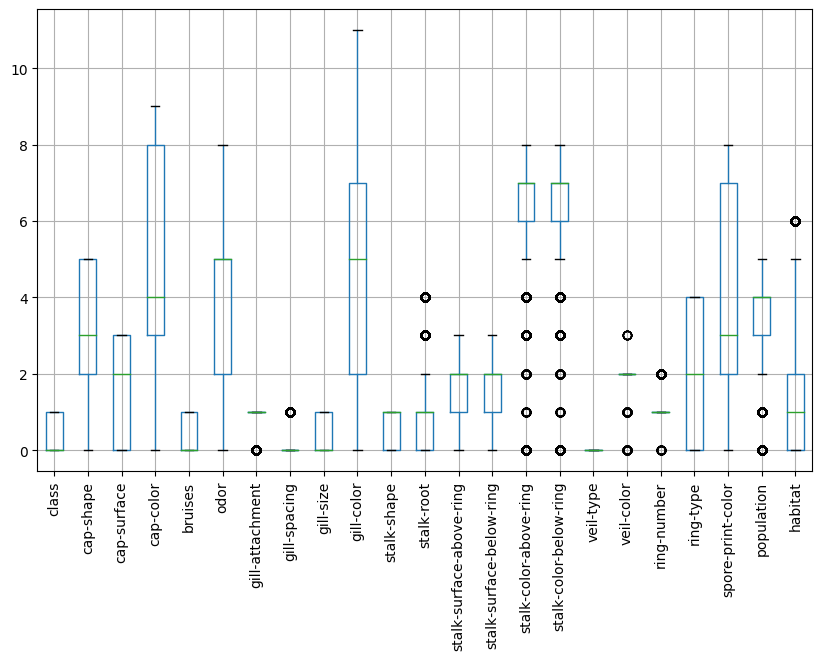

In [5]:
plt.figure(figsize=(10,6))
df.boxplot()
plt.xticks(rotation=90)
plt.show()

# **Method for finding outlier in column**

In [6]:
def findOutlier(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    lowerLimit=Q1-1.5*IQR
    upperLimit=Q3+1.5*IQR
    outlier=df[(df<lowerLimit) | (df>upperLimit)]
    return outlier

In [8]:
outlier_habitat=findOutlier(df['habitat'])
outlier_population=findOutlier(df['population'])
outlier_ring_number=findOutlier(df['ring-number'])
outlier_veil_color=findOutlier(df['veil-color'])
outlier_scar=findOutlier(df['stalk-color-above-ring'])
outlier_scbr=findOutlier(df['stalk-color-below-ring'])
outlier_sr=findOutlier(df['stalk-root'])
outlier_gs=findOutlier(df['gill-spacing'])
outlier_ga=findOutlier(df['gill-attachment'])
# print(outliers_habitat.name)
# print("number of outliers: "+ str(len(outliers_habitat)))

# print('max outlier value: '+ str(outliers_habitat.max()))

# print('min outlier value: '+ str(outliers_habitat.min()))


# **Method for getting all the outliers in the data set**

In [9]:
def outliers_list():
    outliers=[]
    for i in columns:
        outlier=findOutlier(df[i])
        if len(outlier)>0:
            outliers.append(outlier)
    return outliers


# **Print all columns outlier**

In [10]:
def print_all_outliers(outliers):
    for i in range (0,len(outliers)):
        print(columns[i])
        print("number of outliers: "+ str(len(outliers[i])))
        print('max outlier value: '+ str(outliers[i].max()))
        print('min outlier value: '+ str(outliers[i].min()))


# **Drop all the outliers in the dataset**

In [11]:
def drop_outliers(df):
   #outlier=outliers[outliers.index(column_name)]
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   lowerLimit=q1-1.5*IQR
   upperLimit=q3+1.5*IQR
   outlier_mask = (df < upperLimit) & (df > lowerLimit)
   df_clean = df[outlier_mask]
   return df_clean

In [12]:
df['habitat']=drop_outliers(df['habitat'])
df['population']=drop_outliers(df['population'])
df['stalk-color-above-ring']=drop_outliers(df['stalk-color-above-ring'])
df['stalk-color-below-ring']=drop_outliers(df['stalk-color-below-ring'])
df['gill-attachment']=drop_outliers(df['gill-attachment'])
df['gill-size']=drop_outliers(df['gill-size'])
df['stalk-root']=drop_outliers(df['stalk-root'])
df['ring-number']=drop_outliers(df['ring-number'])
df['veil-color']=drop_outliers(df['veil-color'])


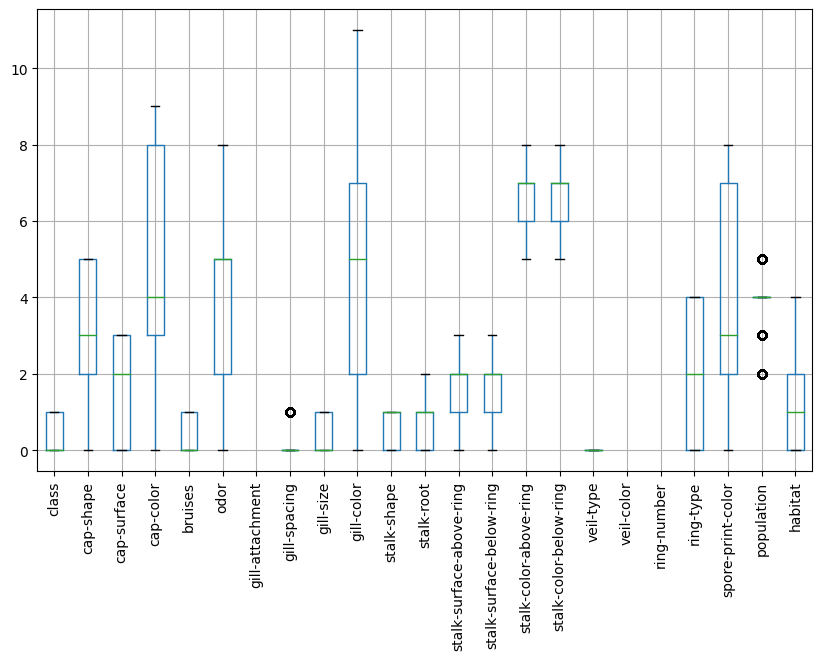

In [13]:
plt.figure(figsize=(10,6))
df.boxplot()
plt.xticks(rotation=90)
plt.show()

c:\Users\Mohit Computers\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


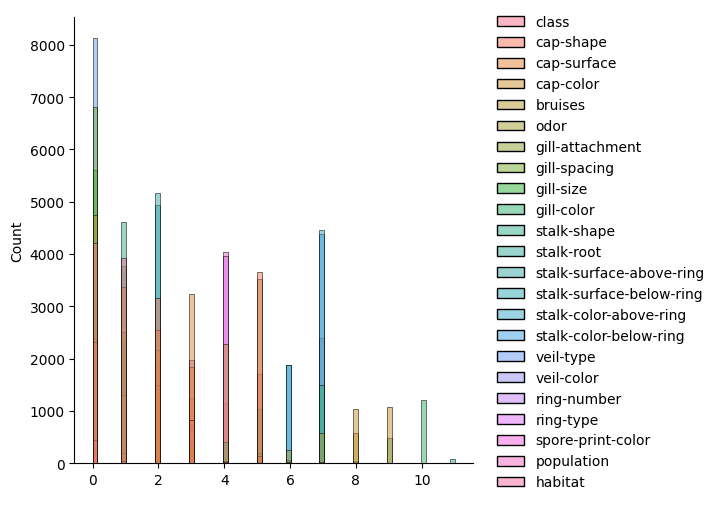

In [14]:
sns.displot(df)

In [15]:
df.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment             8124
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  1312
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring      1588
stalk-color-below-ring      1652
veil-type                      0
veil-color                  8124
ring-number                 8124
ring-type                      0
spore-print-color              0
population                   724
habitat                      560
dtype: int64

# **Drop columns which have maximum null values**

In [16]:
df=df.drop(['veil-color','ring-number','gill-attachment','veil-type'],axis=1)


In [17]:
df.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  1312
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring      1588
stalk-color-below-ring      1652
ring-type                      0
spore-print-color              0
population                   724
habitat                      560
dtype: int64

In [18]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   3
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       4
stalk-color-below-ring       4
ring-type                    5
spore-print-color            9
population                   4
habitat                      5
dtype: int64

In [19]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,0,1,4,0,NaN,2,2,7.0,7.0,4,2,3.0,NaN
1,0,5,2,9,1,0,0,0,4,0,2.0,2,2,7.0,7.0,4,3,2.0,1.0
2,0,0,2,8,1,3,0,0,5,0,2.0,2,2,7.0,7.0,4,3,2.0,3.0
3,1,5,3,8,1,6,0,1,5,0,NaN,2,2,7.0,7.0,4,2,3.0,NaN
4,0,5,2,3,0,5,1,0,4,1,NaN,2,2,7.0,7.0,0,3,NaN,1.0


In [20]:
correlation_matrix=df.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

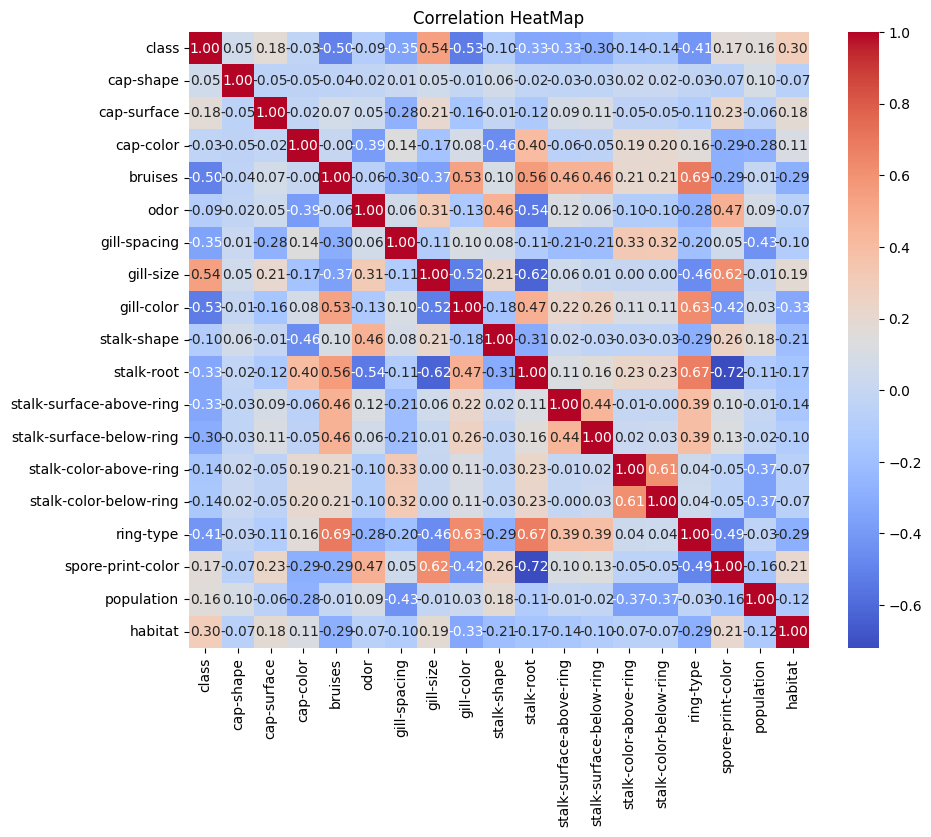

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation HeatMap")
plt.show

# **Now we are filling null values in the data by using KNNImputer class**

In [22]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
df_filled_array=imputer.fit_transform(df)
df_filled=pd.DataFrame(df_filled_array,columns=df.columns)

In [23]:
df_filled.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [24]:
df_filled.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,1.0,5.0,2.0,4.0,1.0,6.0,0.0,1.0,4.0,0.0,1.0,2.0,2.0,7.0,7.0,4.0,2.0,3.0,1.0
1,0.0,5.0,2.0,9.0,1.0,0.0,0.0,0.0,4.0,0.0,2.0,2.0,2.0,7.0,7.0,4.0,3.0,2.0,1.0
2,0.0,0.0,2.0,8.0,1.0,3.0,0.0,0.0,5.0,0.0,2.0,2.0,2.0,7.0,7.0,4.0,3.0,2.0,3.0
3,1.0,5.0,3.0,8.0,1.0,6.0,0.0,1.0,5.0,0.0,2.0,2.0,2.0,7.0,7.0,4.0,2.0,3.0,1.0
4,0.0,5.0,2.0,3.0,0.0,5.0,1.0,0.0,4.0,1.0,1.0,2.0,2.0,7.0,7.0,0.0,3.0,3.0,1.0


# **Applying KNN Model**

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
x=df_filled.drop('class',axis=1)
y=df_filled['class']

In [26]:
x_train , x_test , y_train , y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
knn1=KNeighborsClassifier(n_neighbors=5,p=1)#manthon distance
knn2=KNeighborsClassifier(n_neighbors=10,p=2)#echiludian distance
knn1.fit(x_train,y_train)
knn2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

# **Here i got an error of contigous flag so i first convert x_test into numpy array then call predict method**

In [31]:


x_test_array = np.array(x_test)
pred1 = knn1.predict(x_test_array)
pred2 = knn2.predict(x_test_array)


c:\Users\Mohit Computers\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Mohit Computers\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [32]:
cm1 = confusion_matrix(y_test,pred1)
cm2 = confusion_matrix(y_test,pred2)

In [33]:
print(cm1)

[[843   0]
 [  0 782]]


In [34]:
print(cm2)

[[837   6]
 [  3 779]]


In [35]:
cl1 = classification_report(y_test,pred1)
cl2 = classification_report(y_test,pred2)

In [36]:
print(cl1)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       843
         1.0       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [37]:
print(cl2)

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       843
         1.0       0.99      1.00      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

